<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/RF_Tungkub_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Estimasi ETo dengan Algoritma Random Forest**

Data Masukan : Kelembaban Udara

In [1]:
#import library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Reading dataset dalam format data Excel
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()


,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1256.791534,193.254701,33.560402,69,247.677118,0.891638,0.363934,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1252.71032,115.721378,28.75582,69,221.856096,0.798682,0.325993,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1249.075848,144.219926,24.783312,69,179.470678,0.646094,0.263712,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1242.151358,193.254701,16.314088,69,120.980315,0.435529,0.177767,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1239.162128,288.439852,16.06366,69,119.166415,0.428999,0.175102,Longitude,115.00,degrees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [4]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)

In [5]:
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()


,Rs,RH,U,T,ET
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,193.424510,81.053563,0.400599,26.378555,0.155357
std,303.738622,12.268428,0.285843,3.545059,0.246325
min,0.600000,39.576000,0.200000,19.124000,-0.009460
25%,0.600000,70.335000,0.200000,23.671000,0.000700
50%,4.400000,85.489000,0.330000,25.665000,0.004385
75%,265.600000,91.156000,0.670000,29.269000,0.211899
max,1276.900000,99.261000,2.670000,35.789000,1.022905


In [6]:
#Input features dan target variable
target_variable = df['ET']
features_variable = df['RH']

X = features_variable #independent variabel
y = target_variable #dependent variabel

In [7]:
#Split dataset untuk training dan testing dataset dengan perbandingan 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#Jumlah data untuk training dan testing
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(3892,) (1669,) (3892,) (1669,)


In [8]:
#Random Forest Model
model = RandomForestRegressor(n_estimators = 150)

In [9]:
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)
#Fitting model
rf = model.fit(X_train_reshaped, y_train)

In [10]:
#Save model
import joblib
joblib.dump(model,'Model_Tungkub_RH.joblib')

['Model_Tungkub_RH.joblib']

Model Evaluation

In [ ]:
#Prediction on Training Dataset
ytrain_pred = rf.predict(X_train_reshaped)

#Nilai R Squared pada Data Training
print('Nilai R_Squared (Training): %.2f'% r2_score(y_train, ytrain_pred))
#Nilai MSE pada Data Training
print('Nilai MSE (Training): %.2f'% mean_squared_error(y_train, ytrain_pred))
#Nilai RMSE pada Data Training
print('The RMSE (Training): %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

Nilai R_Squared (Training): 0.91
Nilai MSE (Training): 0.01
The RMSE (Training): 0.07


In [ ]:
#Prediction on Testing Dataset
ytest_pred =rf.predict(X_test_reshaped)

#Nilai R Squared pada Data Testing
print('Nilai R_Squared (Testing): %.2f'% r2_score(y_test, ytest_pred))
#Nilai MSE pada Data Testing
print('Nilai MSE (Testing): %.2f'% mean_squared_error(y_test, ytest_pred))
#Nilai RMSE pada Data Testing
print('Nilai RMSE (Testing): %.2f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))

Nilai R_Squared (Testing): 0.52
Nilai MSE (Testing): 0.03
Nilai RMSE (Testing): 0.18


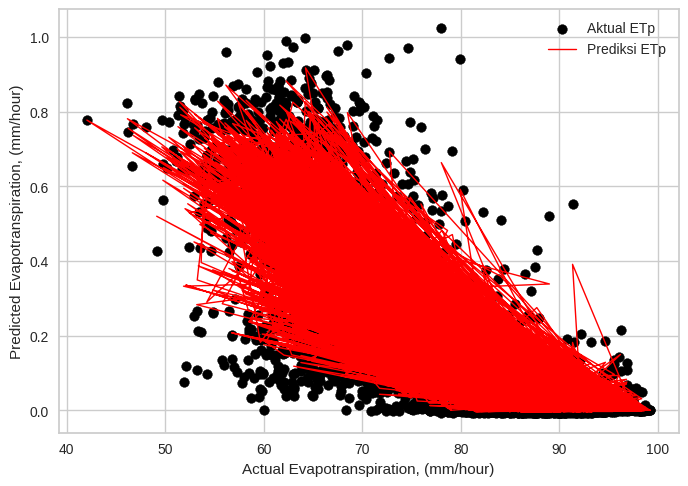

In [ ]:
import matplotlib.pyplot as plt
# Plot pada data pelatihan
plt.scatter(X_train_reshaped, y_train, color='black', label='Aktual ETp')
plt.plot(X_train_reshaped, ytrain_pred, color='red', label='Prediksi ETp', linewidth=1)
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()


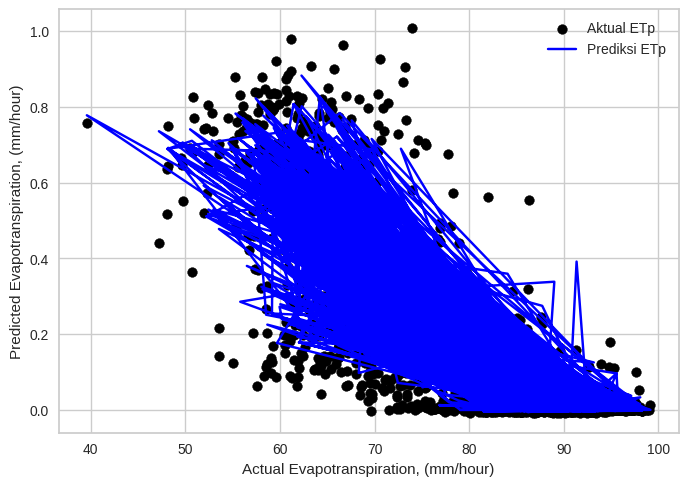

In [ ]:
#Plot pada data test
plt.scatter(X_test_reshaped, y_test, color = 'black', label = 'Aktual ETp')
plt.plot(X_test_reshaped, ytest_pred, color='blue', label='Prediksi ETp')
plt.xlabel('Actual Evapotranspiration, (mm/hour)')
plt.ylabel('Predicted Evapotranspiration, (mm/hour)')
plt.legend()
plt.show()

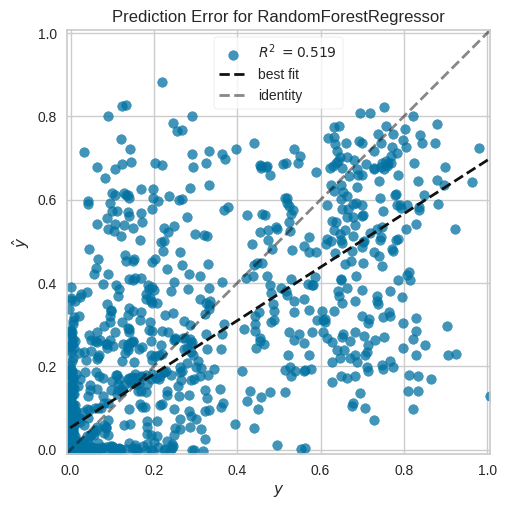

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#Plotting Prediction Error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

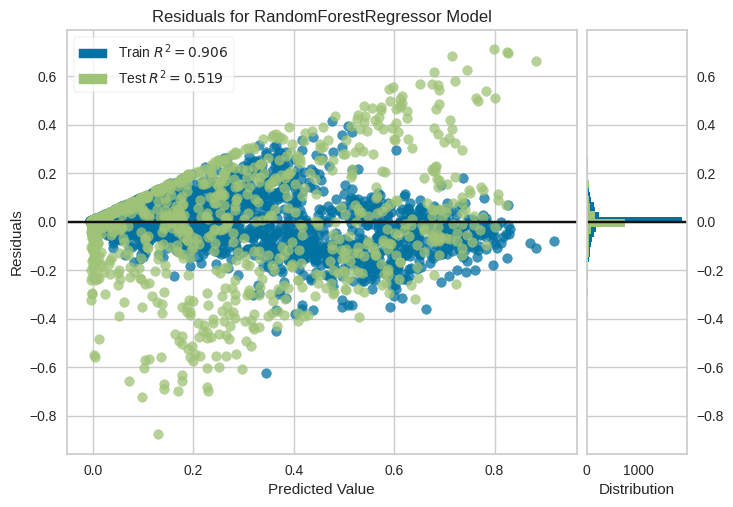

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf)
visualizer.fit(X_train_reshaped, y_train)
visualizer.score(X_test_reshaped, y_test)
visualizer.poof()

In [ ]:
# K Fold Cross Validation
from sklearn.model_selection import cross_val_score
#Training Model CV
score_train = cross_val_score(rf, X_train_reshaped, y_train, scoring ='neg_mean_squared_error', cv = 10)
print(score_train)
#The mean score
print('Mean CV (Train):', np.mean(score_train))

[-0.03723943 -0.03136103 -0.02816273 -0.03010712 -0.0267515  -0.03807655
 -0.03551479 -0.03548914 -0.02868114 -0.03243065]
Mean CV (Train): -0.032381409323847705


In [ ]:
#Testing Model CV
score_test = cross_val_score(rf, X_test_reshaped, y_test, scoring ='neg_mean_squared_error', cv = 10)
print(score_test)
#The mean score test
print('Mean CV (Test)', np.mean(score_test))

[-0.0322229  -0.03333527 -0.02060624 -0.03839658 -0.02987494 -0.03608603
 -0.0222968  -0.03634863 -0.03275861 -0.02946144]
Mean CV (Test) -0.031138745229401195
